In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load datasets
online_retail = pd.read_excel("/content/Online_Retail_Cleaned.xlsx", engine='openpyxl')
rfm = pd.read_csv("/content/rfm_segmented.csv")

1. Heatmap of Monthly Spending by Segment

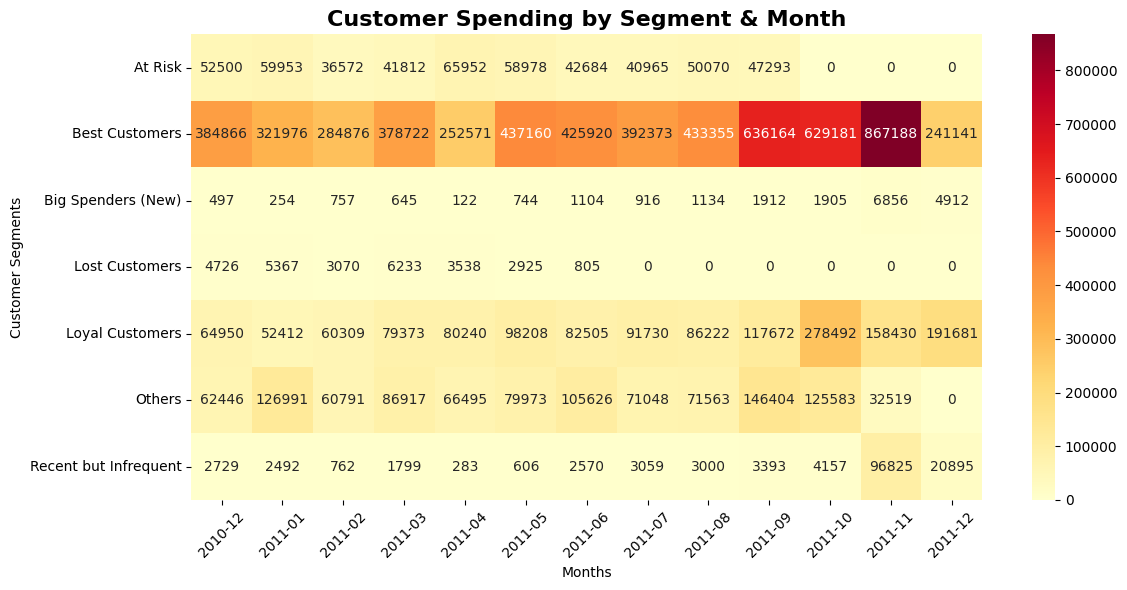

In [5]:
merged_df = pd.merge(online_retail, rfm[['CustomerID', 'Segment']], on='CustomerID', how='left')

merged_df["Month"] = merged_df["InvoiceDate"].dt.strftime('%Y-%m') # Extract Month and Year
pivot_data = merged_df.pivot_table(values="TotalPrice", index="Segment", columns="Month", aggfunc="sum").fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_data, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Customer Spending by Segment & Month", fontsize=16, weight="bold")
plt.ylabel("Customer Segments")
plt.xlabel("Months")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. Line Chart of Spending Trends

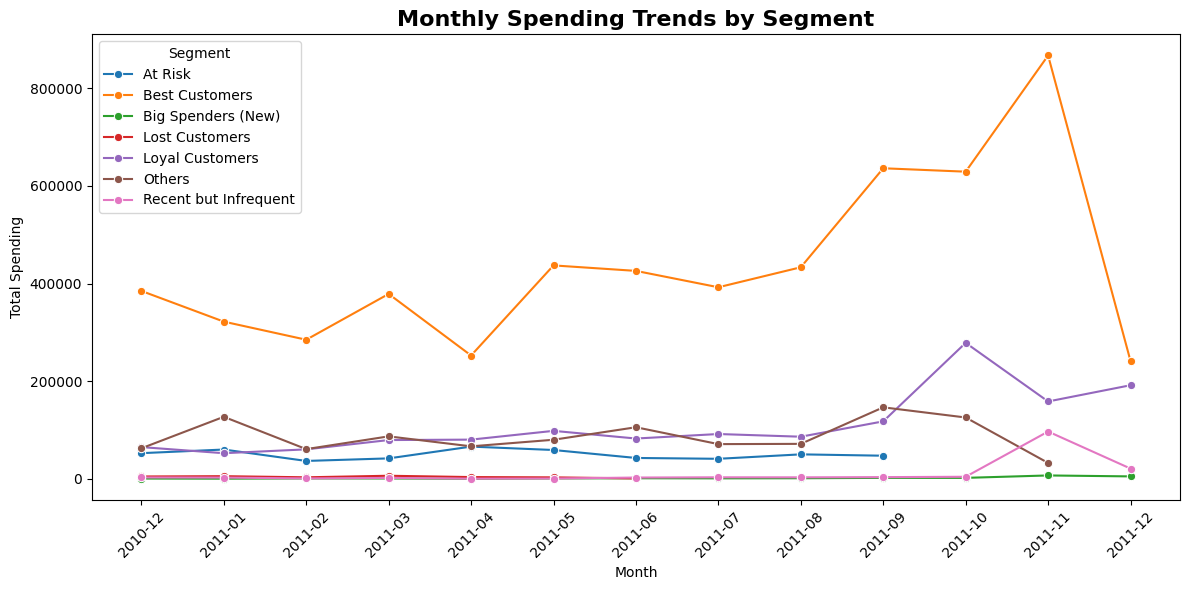

In [6]:
monthly_trends = merged_df.groupby(['Month','Segment'])['TotalPrice'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_trends, x="Month", y="TotalPrice", hue="Segment", marker="o")
plt.title("Monthly Spending Trends by Segment", fontsize=16, weight="bold")
plt.xlabel("Month")
plt.ylabel("Total Spending")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. Customer Segment Distribution (Bar Chart)

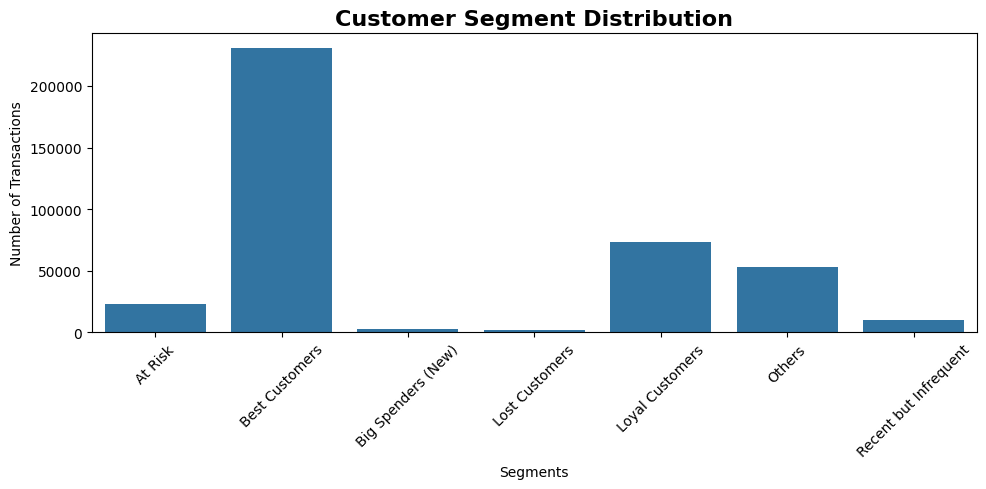

In [7]:
segment_dist = merged_df.groupby("Segment")['TotalPrice'].count().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=segment_dist, x="Segment", y="TotalPrice")
plt.title("Customer Segment Distribution", fontsize=16, weight="bold")
plt.ylabel("Number of Transactions")
plt.xlabel("Segments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

4. Segment Share of Total Customers (Pie Chart)

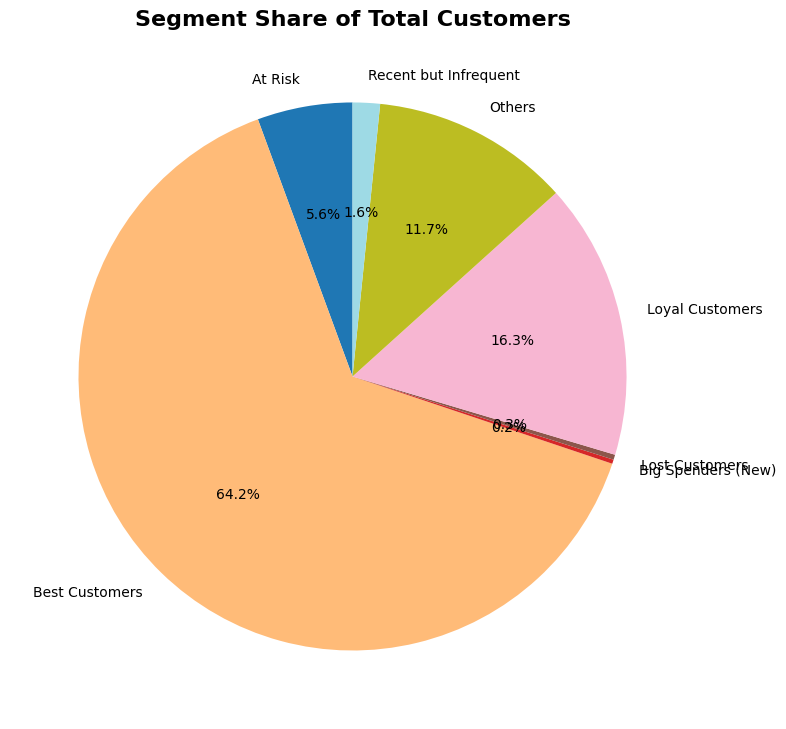

In [8]:
segment_share = merged_df.groupby("Segment")['TotalPrice'].sum()
plt.figure(figsize=(8,8))
segment_share.plot(kind="pie", autopct='%1.1f%%', startangle=90, cmap="tab20")
plt.title("Segment Share of Total Customers", fontsize=16, weight="bold")
plt.ylabel("")
plt.tight_layout()
plt.show()

**OTHER:**

Stacked Area Chart - Monthly spending by Segment

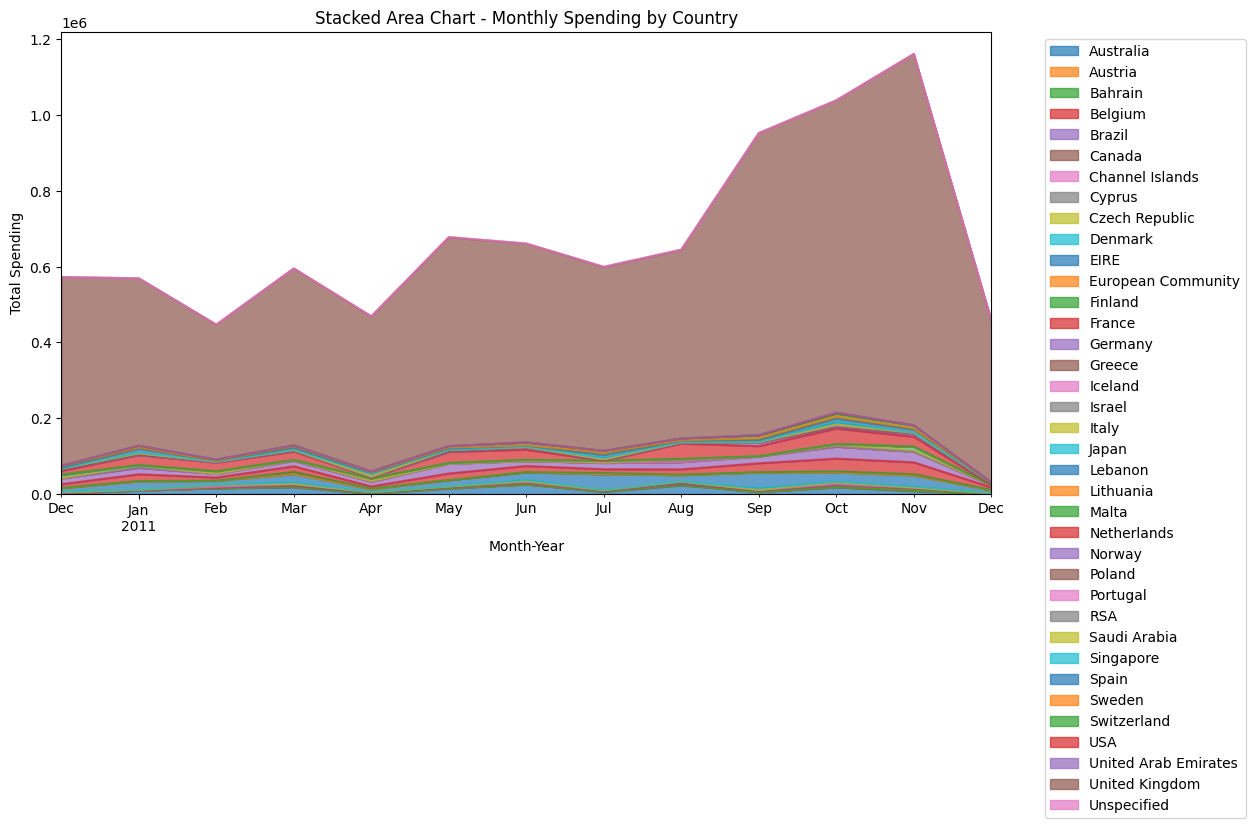

In [7]:
merged_df["MonthYear"] = merged_df["InvoiceDate"].dt.to_period("M")
monthly_segment = merged_df.groupby(['MonthYear', 'Country'])['TotalPrice'].sum().reset_index()
pivot_data = monthly_segment.pivot(index='MonthYear', columns='Country', values='TotalPrice').fillna(0)

pivot_data.plot.area(figsize=(12,6), alpha=0.7)
plt.title("Stacked Area Chart - Monthly Spending by Country")
plt.ylabel("Total Spending")
plt.xlabel("Month-Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [6]:
merged_df = pd.merge(online_retail, rfm[['CustomerID', 'Segment']], on='CustomerID', how='left')

Box Plot - Spending distribution by Segment

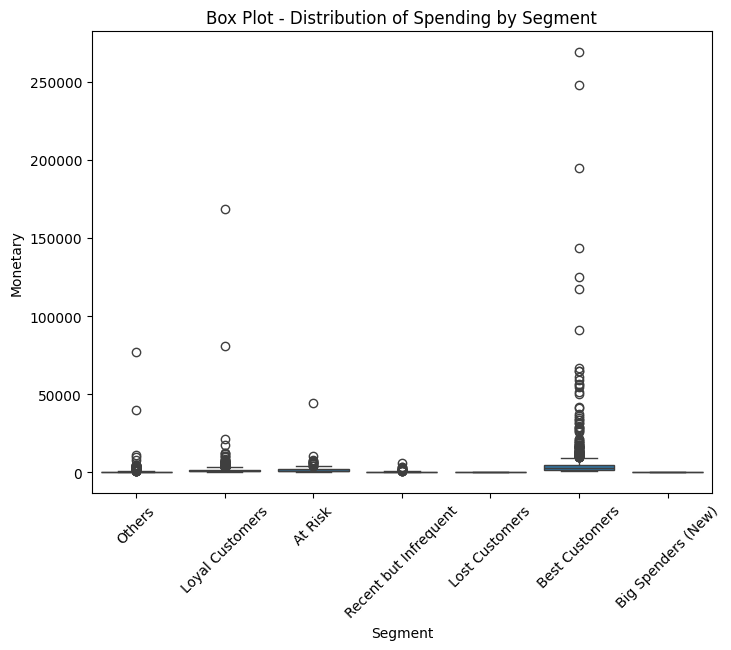

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(data=rfm, x='Segment', y='Monetary')
plt.title("Box Plot - Distribution of Spending by Segment")
plt.xticks(rotation=45)
plt.show()

Treemap - Segment share of total customers

In [12]:
!pip install squarify

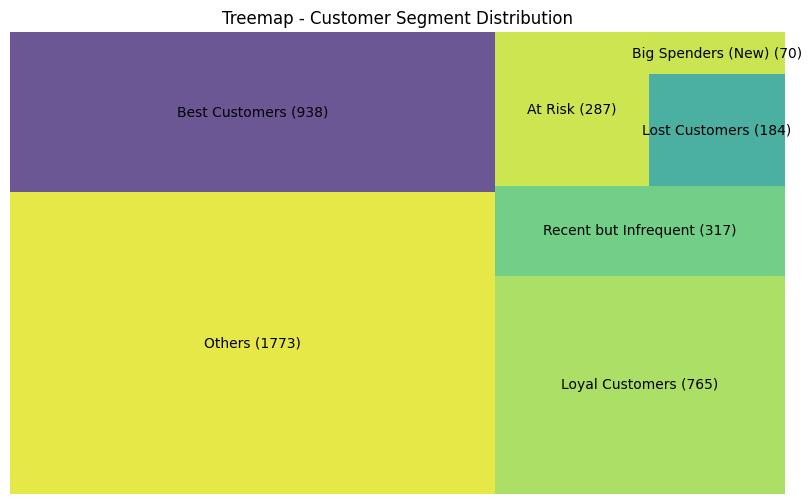

In [13]:
import squarify

segment_counts = rfm['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']

plt.figure(figsize=(10,6))
squarify.plot(sizes=segment_counts['Count'],
              label=segment_counts['Segment'] + " (" + segment_counts['Count'].astype(str) + ")",
              alpha=0.8)
plt.title("Treemap - Customer Segment Distribution")
plt.axis("off")
plt.show()

**EXTRA :**

5. Average Spend by Segment (Bar Chart)

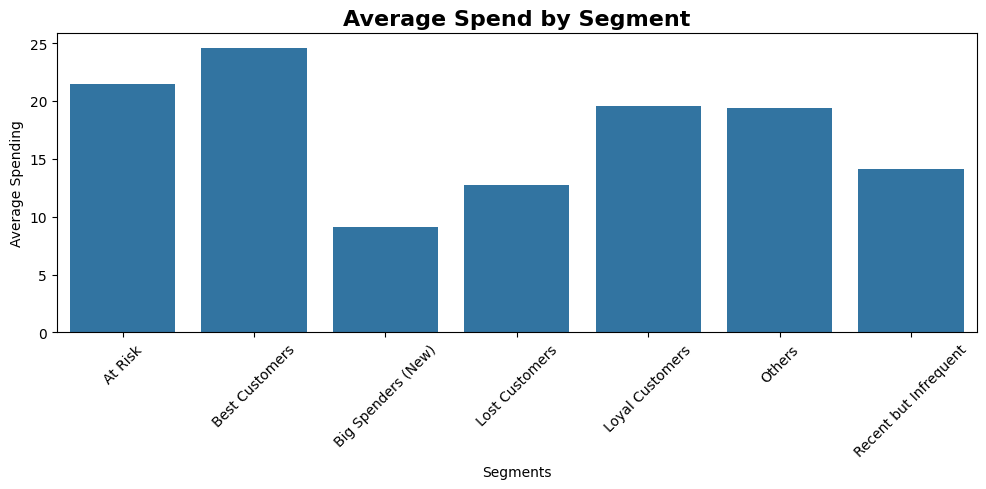

In [9]:
avg_spend = merged_df.groupby("Segment")['TotalPrice'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=avg_spend, x="Segment", y="TotalPrice")
plt.title("Average Spend by Segment", fontsize=16, weight="bold")
plt.ylabel("Average Spending")
plt.xlabel("Segments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6. Average Monetary Value by Segment

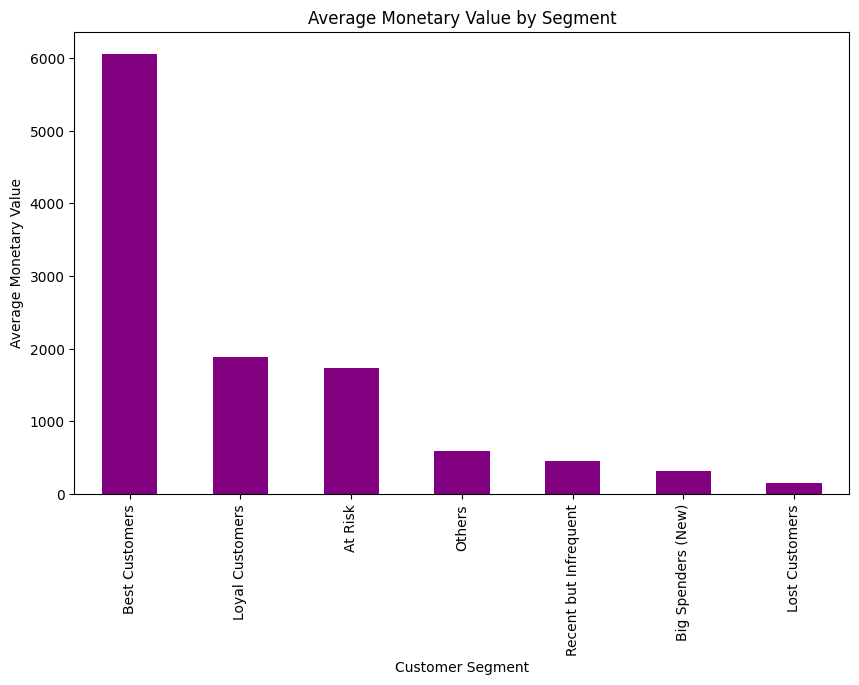

In [10]:
avg_monetary = rfm.groupby("Segment")["Monetary"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
avg_monetary.plot(kind="bar", color="purple")
plt.title("Average Monetary Value by Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Average Monetary Value")
plt.show()

7. Scatter Plot → Recency vs Frequency (colored by Segment)

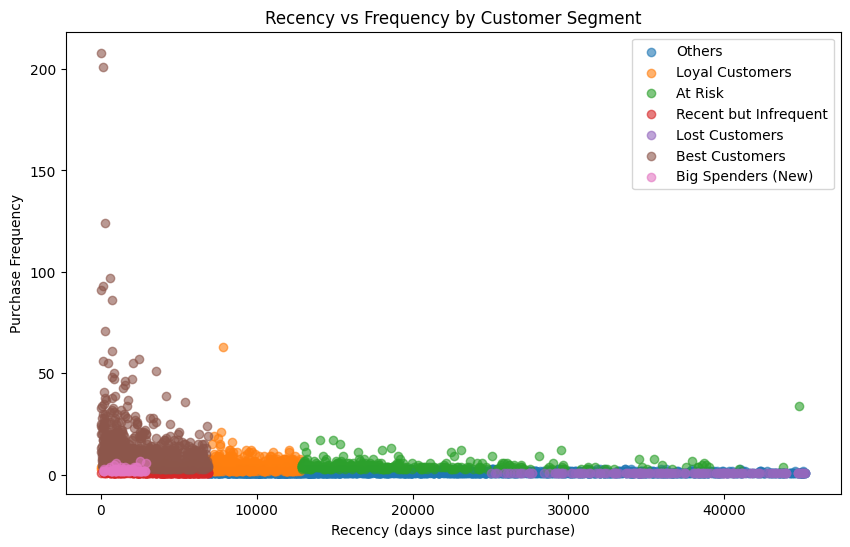

In [11]:
plt.figure(figsize=(10,6))
for segment in rfm["Segment"].unique():
    seg_data = rfm[rfm["Segment"] == segment]
    plt.scatter(seg_data["Recency"], seg_data["Frequency"], label=segment, alpha=0.6)

plt.title("Recency vs Frequency by Customer Segment")
plt.xlabel("Recency (days since last purchase)")
plt.ylabel("Purchase Frequency")
plt.legend()
plt.show()

8. Line Chart → Monthly Sales Trend

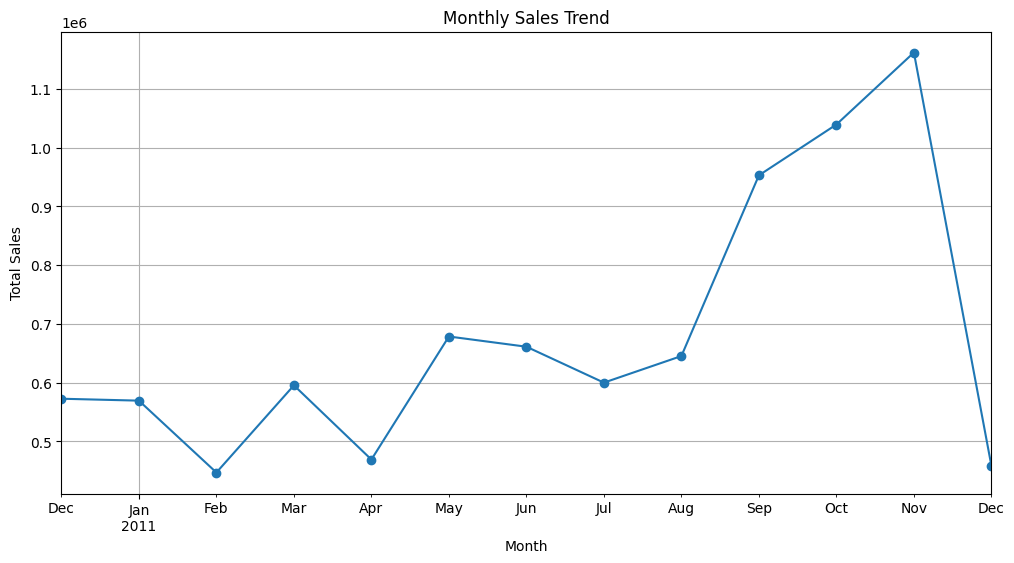

In [12]:
online_retail["InvoiceDate"] = pd.to_datetime(online_retail["InvoiceDate"])
monthly_sales = online_retail.groupby(online_retail["InvoiceDate"].dt.to_period("M"))["TotalPrice"].sum()
plt.figure(figsize=(12,6))
monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()